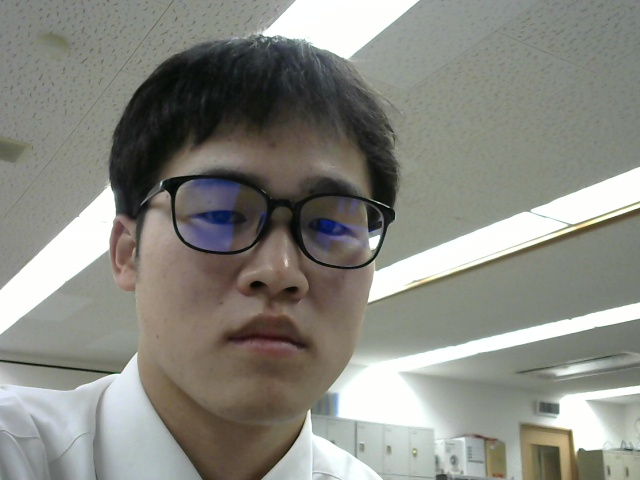

1/1 [==============================] - 0s 101ms/step
Found 1 face(s) in the image.


Face 1: [137, 111, 234, 311]
24-01-22 20:09:57 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /home/shota/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 7.64MB/s]


24-01-22 20:10:00 - age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /home/shota/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [02:39<00:00, 3.38MB/s] 


24-01-22 20:12:41 - gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /home/shota/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [02:41<00:00, 3.32MB/s] 


24-01-22 20:15:27 - race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /home/shota/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [04:36<00:00, 1.94MB/s] 
Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]   

[{'age': 25, 'region': {'x': 0, 'y': 0, 'w': 234, 'h': 311}, 'face_confidence': 0, 'gender': {'Woman': 1.33327916264534, 'Man': 98.66672158241272}, 'dominant_gender': 'Man', 'emotion': {'angry': 1.7413553063696987, 'disgust': 1.2686206310087466e-05, 'fear': 12.185630909875739, 'happy': 4.985706357444091, 'sad': 27.298233186988018, 'surprise': 7.159165401359249, 'neutral': 46.62989933847181}, 'dominant_emotion': 'neutral', 'race': {'asian': 99.98753070831299, 'indian': 0.0022504715161630884, 'black': 1.582596387272872e-07, 'white': 0.0026408964913571253, 'middle eastern': 5.464128260967982e-07, 'latino hispanic': 0.0075739815656561404}, 'dominant_race': 'asian'}]


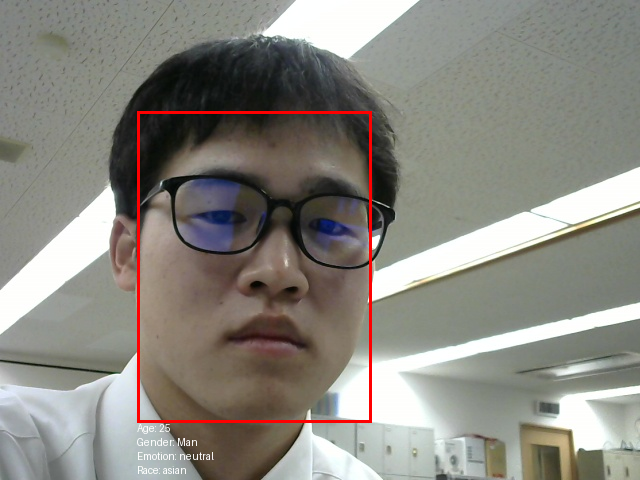

In [6]:
import cv2
import numpy as np
from mtcnn.mtcnn import MTCNN
from deepface import DeepFace
from IPython.display import Image, display
from PIL import Image as PilImage
from PIL import ImageDraw

def detect_faces(image):
    detector = MTCNN()
    face_locations = detector.detect_faces(image)
    return face_locations

def analyze_face(image, face_location):
    x, y, w, h = face_location['box']
    detected_face = image[y:y+h, x:x+w]
    result = DeepFace.analyze(detected_face, actions=['age', 'gender', 'emotion', 'race'], enforce_detection=False)
    return result

def draw_box_and_info(image, face_location, results):
    x, y, w, h = face_location['box']
    draw = ImageDraw.Draw(image)
    draw.rectangle(((x, y), (x+w, y+h)), outline='red', width=3)

    for result in results:
      age = result['age']
      gender = result['dominant_gender']
      emotion = result['dominant_emotion']
      race = result['dominant_race']
      info = "Age: {}\nGender: {}\nEmotion: {}\nRace: {}".format(age, gender, emotion, race)
      draw.text((x, y+h), info, fill='white')

def main(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    face_locations = detect_faces(image)
    print("Found {} face(s) in the image.".format(len(face_locations)))
    print()

    # Convert the OpenCV image to a PIL image for drawing.
    pil_image = PilImage.fromarray(image)

    for index, face_location in enumerate(face_locations):
        print("\nFace {}: {}".format(index+1, face_location['box']))
        results = analyze_face(image, face_location)
        print(results)
        draw_box_and_info(pil_image, face_location, results)

    # Display the image with the face information.
    display(pil_image)

# Upload the image file
input_path = "img/001.jpg"

display(Image(input_path))
main(input_path)
